In [124]:
import numpy.random as rn
from random import random
import numpy as np
# Local imports
from SMPyBandits.Environment import Evaluator
# Import arms
from SMPyBandits.Arms import Bernoulli

from tqdm.notebook import tqdm

In [125]:
# Import algorithms
from SMPyBandits.Policies import EmpiricalMeans, EpsilonGreedy, UCB
from SMPyBandits.Policies.IndexPolicy import IndexPolicy
from SMPyBandits.Policies.BasePolicy import BasePolicy
from SMPyBandits.Policies.with_proba import with_proba

In [126]:
#EmpiricalMeans?

In [127]:
#EmpiricalMeans??

In [128]:
# MAB environment parameters
HORIZON = 10000
REPETITIONS = 100 # Number of repetition of the experiment (to have an average)
N_JOBS = 1 # Number of CPU cores

#: Default value for epsilon for `YourEpsilonGreedy`
EPSILON = 1.0

In [129]:
ENVIRONMENTS = [  # 1)  Bernoulli arms
        {   # An easy but widely adopted problem
            "arm_type": Bernoulli,
            "params": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
        },
        {   # An other problem, best arm = last, with three groups: very bad arms (0.01, 0.02), middle arms (0.3 - 0.6) and very good arms (0.78, 0.8, 0.82)
            "arm_type": Bernoulli,
            "params": [0.01, 0.02, 0.3, 0.4, 0.5, 0.6, 0.795, 0.8, 0.805]
        },
        {   # A very hard problem, as used in [Cappé et al, 2012]
            "arm_type": Bernoulli,
            "params": [0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.05, 0.05, 0.1]
        },
    ]

In [130]:

class YourEpsilonGreedy(BasePolicy):
    r""" The epsilon-greedy random policy.
    """

    def __init__(self, nbArms, epsilon=EPSILON, lower=0., amplitude=1.):
        super(YourEpsilonGreedy, self).__init__(nbArms, lower=lower, amplitude=amplitude)
        assert 0 <= epsilon <= 1, "Error: the 'epsilon' parameter for YourEpsilonGreedy has to be in [0, 1]."  # For DEBUG
        self._epsilon = epsilon

        self.alpha = 2.0
        self.USE_DIMINISHING_EPSILON = True

    # This decorator @property makes this method an attribute, cf. https://docs.python.org/3/library/functions.html#property
    @property
    def epsilon(self):  # This allows us to use time-dependent epsilon coef
        if self.USE_DIMINISHING_EPSILON:
            if self.t == 0:
                return 1
            return self.t ** (-self.alpha)
        return self._epsilon

    def Z(self):
        """Random variable Z is a Bernoulli with parameter epsilon.
        This function returns 1 with probability epsilon, 0 with probability 1 - epsilon."""
        if random() < 1 - self.epsilon:
            return 1
        return 0

    def choice(self):
        """With a probability of epsilon, explore (uniform choice), otherwhise exploit based on  empirical mean rewards."""
        #----------Your Code----------#
        if self.Z():
            # Choose the arm with the largest empirical mean at time t - 1
            empirical_means = []
            for arm in range(self.nbArms):
                if self.pulls[arm] > 0:
                    empirical_means.append(self.rewards[arm] / self.pulls[arm])
                else:
                    empirical_means.append(0)
            return np.argmax(empirical_means)
        else:
            # Choose a random arm
            return rn.randint(self.nbArms)

        #----------End of Your Code----------#
   

In [131]:
POLICIES = [
        # --- EmpiricalMeans (or Greedy) algorithm, a baseline for comparison
        {
            "archtype": EmpiricalMeans,
            "params": {}
        },
        # --- UCB algorithm, a baseline for comparison
        {
            "archtype": UCB,
            "params": {}
        },
        # --- YourEpsilonGreedy algorithm
        {
            "archtype": YourEpsilonGreedy,
            "params": {}
        },
    ]

In [132]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # Number of CPU cores
    "verbosity": 6,      # Max joblib verbosity
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "policies": POLICIES,
}
configuration

{'horizon': 10000,
 'repetitions': 100,
 'n_jobs': 1,
 'verbosity': 6,
 'environment': [{'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
  {'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': [0.01, 0.02, 0.3, 0.4, 0.5, 0.6, 0.795, 0.8, 0.805]},
  {'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': [0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.05, 0.05, 0.1]}],
 'policies': [{'archtype': SMPyBandits.Policies.EmpiricalMeans.EmpiricalMeans,
   'params': {}},
  {'archtype': SMPyBandits.Policies.UCB.UCB, 'params': {}},
  {'archtype': __main__.YourEpsilonGreedy, 'params': {}}]}

In [133]:
# Creating the Evaluator object
evaluation = Evaluator(configuration)

Number of policies in this comparison: 3
Time horizon: 10000
Number of repetitions: 100
Sampling rate for plotting, delta_t_plot: 1
Number of jobs for parallelization: 1
Using this dictionary to create a new environment:
 {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}


Creating a new MAB problem ...
  Reading arms of this MAB problem from a dictionnary 'configuration' = {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]} ...
 - with 'arm_type' = <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>
 - with 'params' = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
 - with 'arms' = [B(0.1), B(0.2), B(0.3), B(0.4), B(0.5), B(0.6), B(0.7), B(0.8), B(0.9)]
 - with 'means' = [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 - with 'nbArms' = 9
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 7.52 ... 
 - a

In [134]:
for envId, env in tqdm(enumerate(evaluation.envs), desc="Problems"):
    # Evaluate just that env
    evaluation.startOneEnv(envId, env)

Problems: 0it [00:00, ?it/s]



Evaluating environment: MAB(nbArms: 9, arms: [B(0.1), B(0.2), B(0.3), B(0.4), B(0.5), B(0.6), B(0.7), B(0.8), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding policy #1 = {'archtype': <class 'SMPyBandits.Policies.EmpiricalMeans.EmpiricalMeans'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class 'SMPyBandits.Policies.EmpiricalMeans.EmpiricalMeans'>, 'params': {}} ...
- Adding policy #2 = {'archtype': <class 'SMPyBandits.Policies.UCB.UCB'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][1]' = {'archtype': <class 'SMPyBandits.Policies.UCB.UCB'>, 'params': {}} ...
- Adding policy #3 = {'archtype': <class '__main__.YourEpsilonGreedy'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][2]' = {'archtype': <class '__main__.YourEpsilonGreedy'>, 'params': {}} ...



- Evaluating policy #1/3: EmpiricalMeans ...


Repeat:   0%|          | 0/100 [00:00<?, ?it/s]

Time t:   0%|          | 0/10000 [00:00<?, ?it/s]


Estimated order by the policy EmpiricalMeans after 10000 steps: [0 1 2 3 4 7 8 5 6] ...
  ==> Optimal arm identification: 77.78% (relative success)...
  ==> Mean distance from optimal ordering: 79.01% (relative success)...



- Evaluating policy #2/3: UCB ...


Repeat:   0%|          | 0/100 [00:00<?, ?it/s]

Time t:   0%|          | 0/10000 [00:00<?, ?it/s]


Estimated order by the policy UCB after 10000 steps: [0 1 5 3 4 7 6 2 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 70.99% (relative success)...



- Evaluating policy #3/3: YourEpsilonGreedy ...


Repeat:   0%|          | 0/100 [00:00<?, ?it/s]

Time t:   0%|          | 0/10000 [00:00<?, ?it/s]


Estimated order by the policy YourEpsilonGreedy after 10000 steps: [6 0 8 3 7 1 5 4 2] ...
  ==> Optimal arm identification: 33.33% (relative success)...
  ==> Mean distance from optimal ordering: 24.07% (relative success)...


Evaluating environment: MAB(nbArms: 9, arms: [B(0.01), B(0.02), B(0.3), B(0.4), B(0.5), B(0.6), B(0.795), B(0.8), B(0.805)], minArm: 0.01, maxArm: 0.805)
- Adding policy #1 = {'archtype': <class 'SMPyBandits.Policies.EmpiricalMeans.EmpiricalMeans'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class 'SMPyBandits.Policies.EmpiricalMeans.EmpiricalMeans'>, 'params': {}} ...
- Adding policy #2 = {'archtype': <class 'SMPyBandits.Policies.UCB.UCB'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][1]' = {'archtype': <class 'SMPyBandits.Policies.UCB.UCB'>, 'params': {}} ...
- Adding policy #3 = {'archtype': <class '__main__.YourEpsilonGreedy'>, 'params': {}} ...
  Creating this p

Repeat:   0%|          | 0/100 [00:00<?, ?it/s]

Time t:   0%|          | 0/10000 [00:00<?, ?it/s]


Estimated order by the policy EmpiricalMeans after 10000 steps: [0 1 3 2 4 8 7 5 6] ...
  ==> Optimal arm identification: 98.76% (relative success)...
  ==> Mean distance from optimal ordering: 70.99% (relative success)...



- Evaluating policy #2/3: UCB ...


Repeat:   0%|          | 0/100 [00:00<?, ?it/s]

Time t:   0%|          | 0/10000 [00:00<?, ?it/s]


Estimated order by the policy UCB after 10000 steps: [1 4 2 0 5 3 6 7 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 70.99% (relative success)...



- Evaluating policy #3/3: YourEpsilonGreedy ...


Repeat:   0%|          | 0/100 [00:00<?, ?it/s]

Time t:   0%|          | 0/10000 [00:00<?, ?it/s]


Estimated order by the policy YourEpsilonGreedy after 10000 steps: [6 1 3 7 8 0 5 4 2] ...
  ==> Optimal arm identification: 37.27% (relative success)...
  ==> Mean distance from optimal ordering: 29.63% (relative success)...


Evaluating environment: MAB(nbArms: 9, arms: [B(0.01), B(0.01), B(0.01), B(0.02), B(0.02), B(0.02), B(0.05), B(0.05), B(0.1)], minArm: 0.01, maxArm: 0.1)
- Adding policy #1 = {'archtype': <class 'SMPyBandits.Policies.EmpiricalMeans.EmpiricalMeans'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class 'SMPyBandits.Policies.EmpiricalMeans.EmpiricalMeans'>, 'params': {}} ...
- Adding policy #2 = {'archtype': <class 'SMPyBandits.Policies.UCB.UCB'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][1]' = {'archtype': <class 'SMPyBandits.Policies.UCB.UCB'>, 'params': {}} ...
- Adding policy #3 = {'archtype': <class '__main__.YourEpsilonGreedy'>, 'params': {}} ...
  Creating this p

Repeat:   0%|          | 0/100 [00:00<?, ?it/s]

Time t:   0%|          | 0/10000 [00:00<?, ?it/s]


Estimated order by the policy EmpiricalMeans after 10000 steps: [0 1 2 3 4 5 7 8 6] ...
  ==> Optimal arm identification: 50.00% (relative success)...
  ==> Mean distance from optimal ordering: 89.51% (relative success)...



- Evaluating policy #2/3: UCB ...


Repeat:   0%|          | 0/100 [00:00<?, ?it/s]

Time t:   0%|          | 0/10000 [00:00<?, ?it/s]


Estimated order by the policy UCB after 10000 steps: [4 1 2 5 3 7 6 0 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 58.02% (relative success)...



- Evaluating policy #3/3: YourEpsilonGreedy ...


Repeat:   0%|          | 0/100 [00:00<?, ?it/s]

Time t:   0%|          | 0/10000 [00:00<?, ?it/s]


Estimated order by the policy YourEpsilonGreedy after 10000 steps: [3 0 2 6 7 1 8 5 4] ...
  ==> Optimal arm identification: 20.00% (relative success)...
  ==> Mean distance from optimal ordering: 45.06% (relative success)...


In [135]:
def plotAll(evaluation, envId):
    evaluation.printFinalRanking(envId)
    evaluation.plotRegrets(envId)


Giving the final ranks ...

Final ranking for this environment #0 : (using less accurate estimate of the regret)
- Policy 'UCB'	was ranked	1 / 3 for this simulation
	(last regret = 329.61,	total regret = 329.78,	total reward = 8666.7,	total weighted selection = 8670.2).
- Policy 'EmpiricalMeans'	was ranked	2 / 3 for this simulation
	(last regret = 554.87,	total regret = 556.22,	total reward = 8445.6,	total weighted selection = 8443.8).
- Policy 'YourEpsilonGreedy'	was ranked	3 / 3 for this simulation
	(last regret = 2834.2,	total regret = 2841.2,	total reward = 6152.5,	total weighted selection = 6158.8).

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 7.52 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 48.89% ...


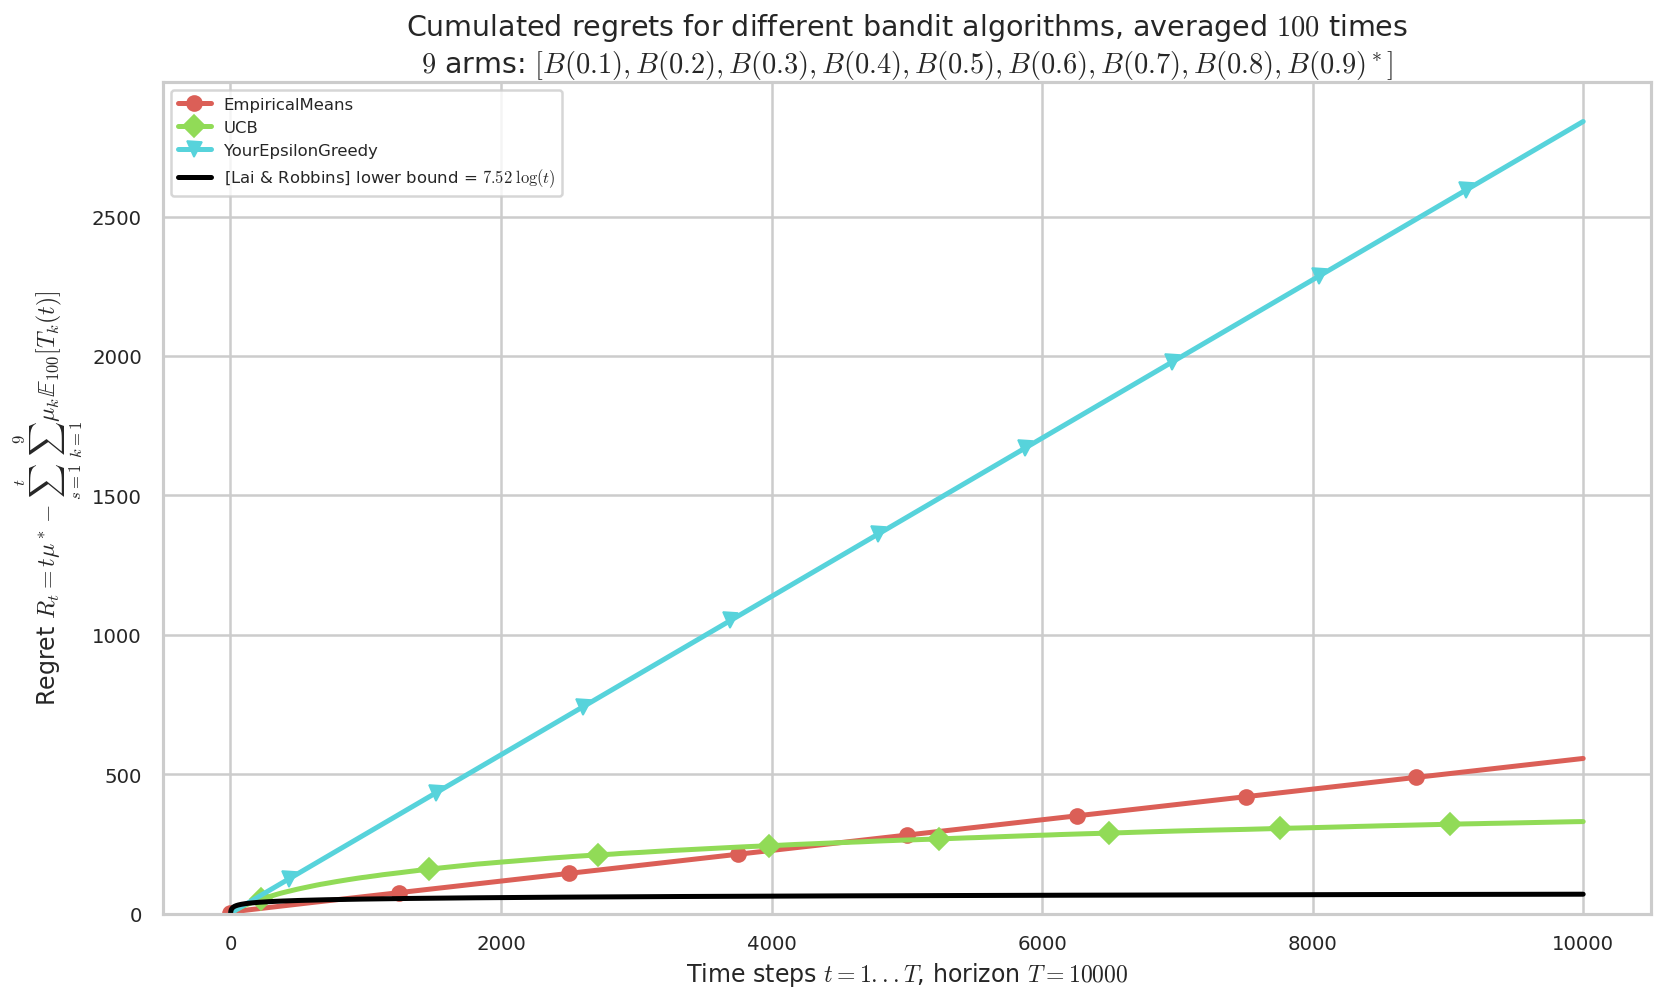

In [136]:
envId = 0
plotAll(evaluation, envId)


Giving the final ranks ...

Final ranking for this environment #1 : (using less accurate estimate of the regret)
- Policy 'EmpiricalMeans'	was ranked	1 / 3 for this simulation
	(last regret = 125.1,	total regret = 125.39,	total reward = 7923.1,	total weighted selection = 7924.6).
- Policy 'UCB'	was ranked	2 / 3 for this simulation
	(last regret = 230.98,	total regret = 231.21,	total reward = 7816.8,	total weighted selection = 7818.8).
- Policy 'YourEpsilonGreedy'	was ranked	3 / 3 for this simulation
	(last regret = 3111.7,	total regret = 3119.4,	total reward = 4933.8,	total weighted selection = 4930.6).

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 101 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 55.39% ...


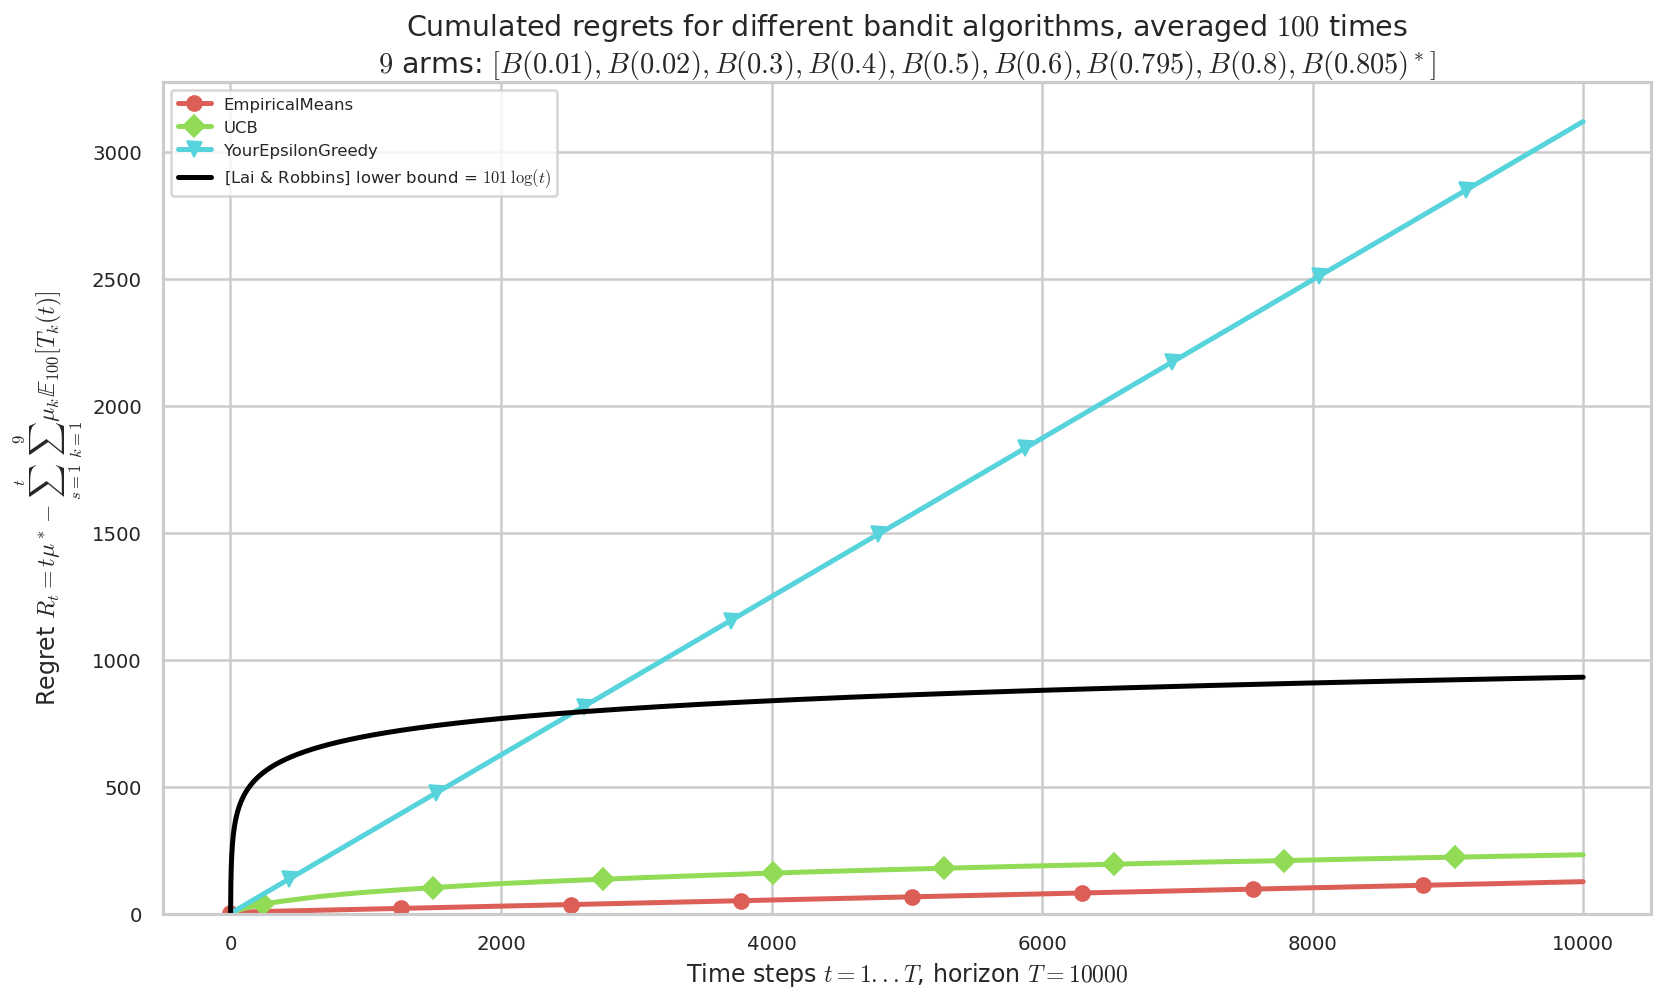

In [137]:
envId = 1
plotAll(evaluation, envId)


Giving the final ranks ...

Final ranking for this environment #2 : (using less accurate estimate of the regret)
- Policy 'UCB'	was ranked	1 / 3 for this simulation
	(last regret = 486.59,	total regret = 487.55,	total reward = 511.15,	total weighted selection = 512.45).
- Policy 'EmpiricalMeans'	was ranked	2 / 3 for this simulation
	(last regret = 487.49,	total regret = 488.68,	total reward = 514.87,	total weighted selection = 511.32).
- Policy 'YourEpsilonGreedy'	was ranked	3 / 3 for this simulation
	(last regret = 864.82,	total regret = 866.95,	total reward = 133.03,	total weighted selection = 133.05).

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 14.5 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 82.11% ...


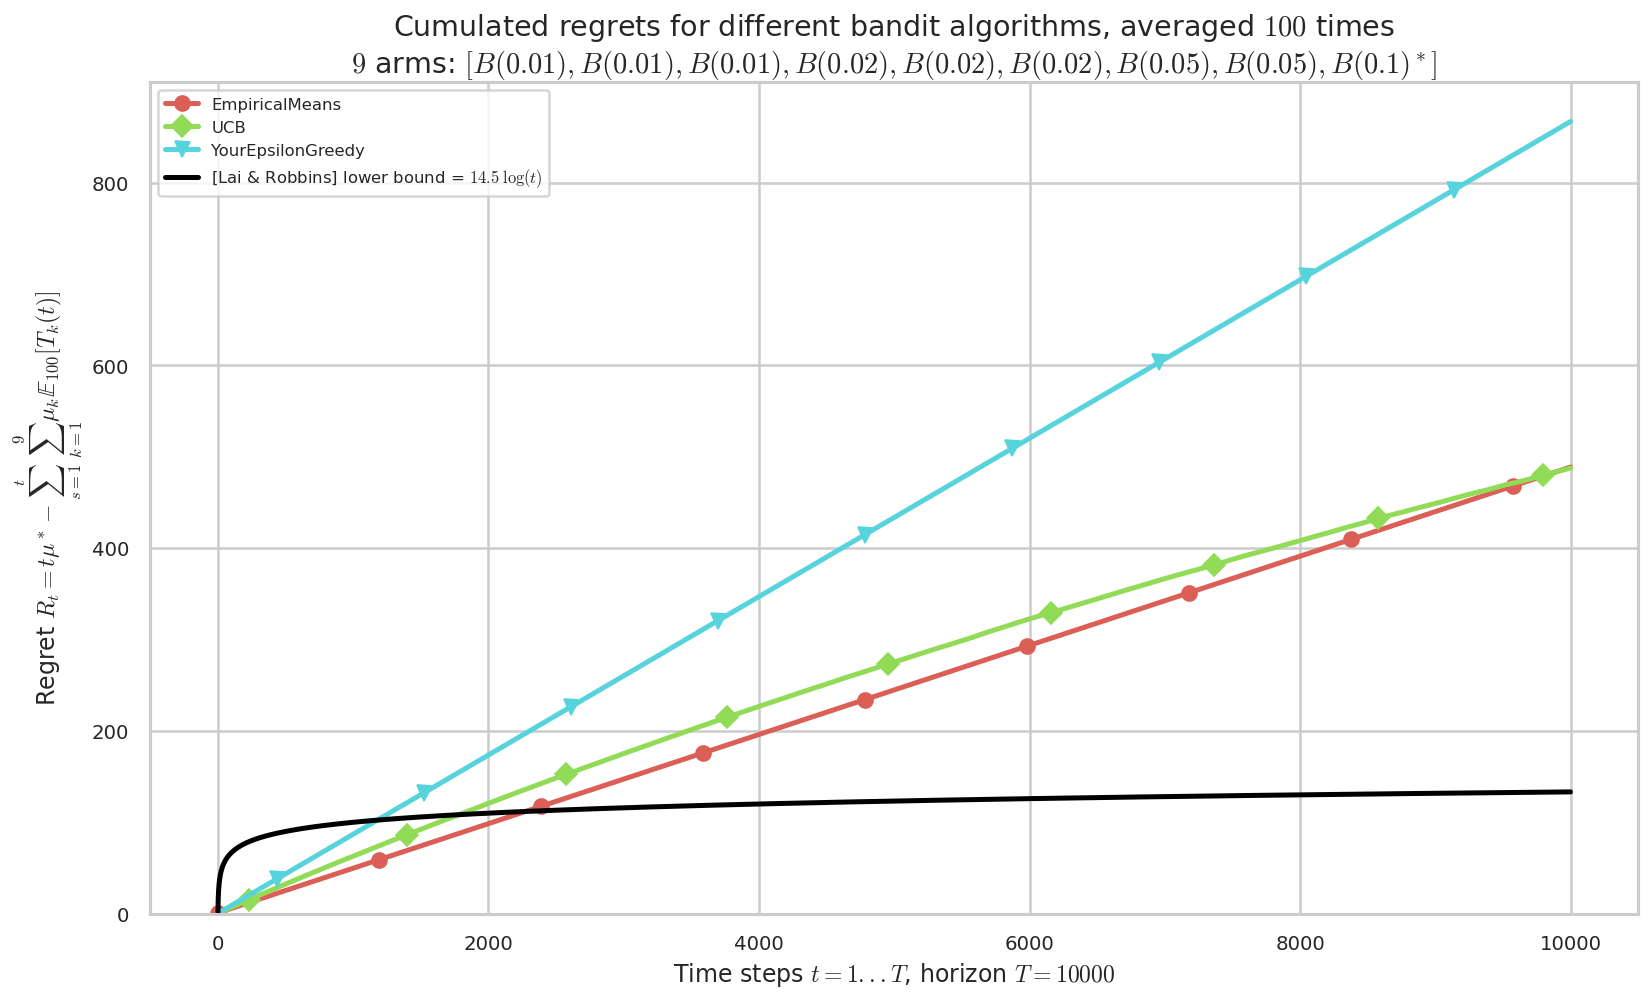

In [138]:
envId = 2
plotAll(evaluation, envId)